In [1]:
import pandas as pd
df = pd.read_csv('data/Fish.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


# **1. 로지스틱 회귀**

### 선형회귀분석과 차이점
- 선형회귀분석 : 종속변수 Y와 한 개 이상의 독립변수 X와의 선형 상관관계를 모델링 (단순선형회귀, 다중선형회귀, 다항선형회귀)
- 로지스틱 회귀분석 : 데이터가 어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측, 확률이 더 높은 범주에 속하는 것으로 분류

#### 1. 목적
- 선형회귀: 연속형 변수 예측
- 로지스틱회귀: 범주형 변수 분류 

#### 2. 출력값
- 선형회귀: 연속적인 실수
- 로지스틱 회귀: 0 ~ 1 사이의 확률

#### 3. 함수
- 선형회귀 : y = B0 + B1 * x
- 로지스틱 회귀: 시그모이드 함수
- 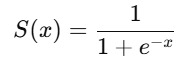

### 1. 필요한 데이터셋 생성

In [7]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [10]:
fish_input = df[['Weight','Length2','Length3','Height','Width']]
fish_target = df[['Species']]

### 2. 학습데이터와 검증데이터로 분리하기

In [11]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target)

### 3. 데이터 전처리(표준화시키기)

In [21]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### 4. Bream과 Smelt에 대해 **이진 로지스틱 회귀**실행

Bream과 Smelt만 포함하는 훈련데이터셋 구성하기

In [25]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bs = train_scaled[bream_smelt_indexes['Species']]
target_bs = train_target[bream_smelt_indexes['Species']]

이진 로지스틱 회귀 적합시키기

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bs, target_bs)

C:\Users\1-15\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

훈련데이터 분류 결과 예측하기

In [30]:
lr.predict(train_bs[:5])  # 0~4열까지의 데이터가 Bream인지 Smelt인지 예측한 결과

array(['Bream', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object)

In [32]:
lr.predict_proba(train_bs[:5]).round(3) # 몇퍼센트의 확률인지

array([[0.958, 0.042],
       [0.986, 0.014],
       [0.028, 0.972],
       [0.98 , 0.02 ],
       [0.985, 0.015]])

로지스틱 회귀 계수 추출

In [33]:
lr.coef_

array([[-0.4749343 , -0.59830858, -0.66710829, -0.93637764, -0.71588814]])

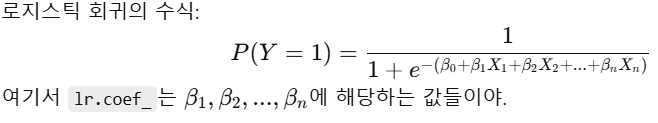

In [ ]:
lr.score(train_scaled, train_target)

# **2. 로지스틱 다중회귀**
- 로지스틱 다중 회귀: 세 개 이상의 클래스에 데이터를 분류하는 방법
- LogisticRegression(C= ?, max_iter= ?)

  
- 로지스틱은 기본적으로 **L2 규제**를 사용(릿지 회귀)
- 회귀계수를 규제하여 과적합을 방지
- C = 1/λ 이기 때문에 C가 작을수록 강한 규제, 클수록 약한 규제를 의미


- max_iter= 최적의 회귀계수를 찾기 위해 반복하는 횟수
- 모델이 로그 손실(Log Loss)을 최소화하는것이 목표

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=20, max_iter=1000)

In [39]:
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9159663865546218
0.925


C:\Users\1-15\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
lr.predict_proba(test_scaled[:5]).round(3)
# ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish'] 각각의 확률

array([[0.01 , 0.   , 0.809, 0.007, 0.   , 0.   , 0.174],
       [0.95 , 0.038, 0.   , 0.   , 0.   , 0.   , 0.011],
       [0.785, 0.166, 0.   , 0.   , 0.003, 0.   , 0.046],
       [0.   , 0.004, 0.797, 0.002, 0.176, 0.002, 0.019],
       [0.018, 0.   , 0.68 , 0.001, 0.   , 0.   , 0.301]])

##### **소프트맥스**
- 전체 확률의 합이 1이 되도록 비율을 보정해준다
- 이진 로지스틱에서는 그냥 시그모이드 함수이지만 여기서는 소프트맥스사용

# **3. 확률적 경사 하강법**

### 3-1. SGD의 역할
- 목표: 손실 함수(loss function)를 최소화하는 계수를 찾는 것.
- 과정: 경사하강법은 모델의 계수를 조정하여 손실 함수의 값을 줄여나간다. 
- 전체 데이터가 아닌 무작위로 선택된 데이터 샘플을 사용하여 계수를 업데이트한다 

#### 3-2. SGD와 L1,L2의 차이
- SGD는 **계수**를 학습하는 알고리즘으로, 손실 함수를 최소화하는 방향으로 가중치를 업데이트한다
- **람다**는 규제를 위한 하이퍼파라미터로, 계수가 커지지 않도록 제어하는 역할을 하며, 모델의 복잡도를 조절한다

### **3-3. 손실함수**
- 모델이 얼마나 잘못 예측했는지를 측정하는 함수
- 모델의 예측값과 실제값이 얼마나 다른지(오차)
- 손실함수를 최소화하는 것이 모델의 학습 목표
- 이진분류 : **로지스틱손실함수**, 다중분류 : **크로스엔트로피손실함수**
- 회귀: **평균제곱오차**

### 3-4. 과정
1. 데이터셋 생성
2. 훈련데이터와 검증데이터로 분류
3. 표준화시키기
4. SGDClassifier 적합시키기

In [47]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log_loss', max_iter = 100)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8319327731092437
0.725


C:\Users\1-15\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 3-5. 에포크 한번 더 시행
- 전체 데이터셋에 대해 한번의 학습 과정을 완료하는 것
- 확률적 경사 하강법은 **하나의**데이터 포인트를 사용하여 가중치 업데이트

In [48]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8319327731092437
0.8


C:\Users\1-15\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
